<a href="https://colab.research.google.com/github/Nickkodag/1st-baseline_model-/blob/main/time_series_for_data_science_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis with python 

Time series are one of the most common data types encountered in daily life. Financial prices, weather, home energy usage, and even weight are all examples of data that can be collected at regular intervals. Almost every data scientist will encounter time series in their daily work and learning how to model them is an important skill in the data science toolbox. One powerful yet simple method for analyzing and predicting periodic data is the additive model. The idea is straightforward: represent a time-series as a combination of patterns at different scales such as daily, weekly, seasonally, and yearly, along with an overall trend. Your energy use might rise in the summer and decrease in the winter, but have an overall decreasing trend as you increase the energy efficiency of your home. An additive model can show us both patterns/trends and make predictions based on these observations.



---


*   Theory
*   Python
*   Type 
*   Tool
*   Advance 
*   Model








In [ ]:
# introduction of time series analysis (BEGINEER)___introduction information of time series
#first install statmodel*
!pip install Statsmodels

Time series is sequence of inforamtion which relate data with time series, we can relate anything with time series 


In [ ]:
#time series letter are describe by latine alphabet like X, Y
#T for period of time
#t=describe single period 

specific for time series 

1.   dealing with missing value is hard 
2. never follow gaus markov

In [ ]:
# lets start with some coding with time series example 
# import library 
#data 
#code 
#code

In [ ]:
import pandas as pd
import statsmodels as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df=pd.read_csv("Index2018.csv")


In [ ]:
df_copy=df.copy()
df_copy#American,german, london, japan

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [ ]:
df_copy.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
df_copy.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plot time series data to analysis market 


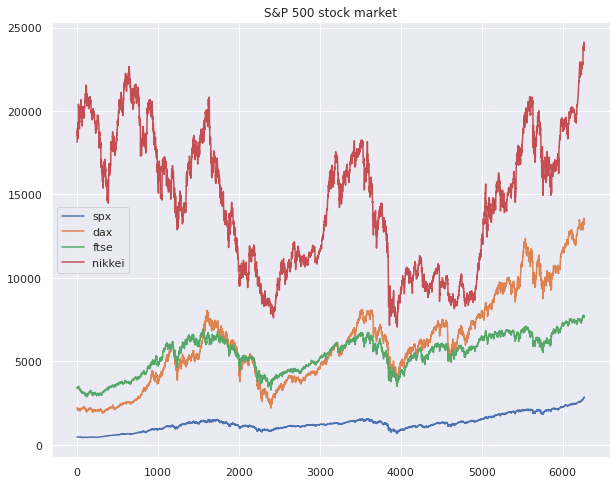

In [ ]:

df_copy.plot(figsize=(10,8),title="S&P 500 stock market")
plt.show()

# To know density of data we will plot qq plot
"Q–Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. "

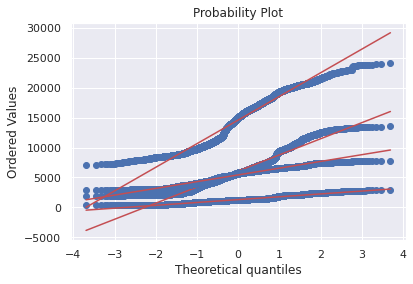

In [ ]:
import scipy.stats
import pylab # Quantile-Quantile plot will show data fit normal distribution
scipy.stats.probplot(df_copy.spx,plot=pylab)
scipy.stats.probplot(df_copy.dax,plot=pylab)
scipy.stats.probplot(df_copy.ftse,plot=pylab)
scipy.stats.probplot(df_copy.nikkei,plot=pylab)
pylab.show()


# convert data column in time series


In [ ]:
df_copy.date.describe()# top is random date 

count           6269
unique          6269
top       03/10/2011
freq               1
Name: date, dtype: object

In [ ]:
# use to date time method
df_copy.date=pd.to_datetime(df_copy.date,dayfirst="True")

In [ ]:
df_copy.head()
df_copy.date.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
#change index 
df_copy.set_index("date",inplace=True)

df_copy

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


# let's definr time series frequency

In [ ]:
df_copy=df_copy.asfreq("d")
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


# NAN period have no data because those are weekday 

In [ ]:
df_copy=df_copy.asfreq("b")
df_copy.head()
#Asfreq method have "b" attributr, with this method we can have value which we recorded on business date 


,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
#Handling missing data 
df_copy.isnull().sum() # since we use business date  it develope missing  value 

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
df_copy=df_copy.fillna(value=df_copy.mean())# taking average mean #common practice

In [ ]:
df_copy.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Add or remove column to perform accurate measurement

In [ ]:
df_copy['market_value']=df_copy.spx

In [ ]:
df_copy['spx'].describe()

count    6277.000000
mean     1288.127542
std       487.275611
min       438.920000
25%       993.055652
50%      1233.980000
75%      1459.684218
max      2872.867839
Name: spx, dtype: float64

In [ ]:
del df_copy['dax'], df_copy['ftse'], df_copy['nikkei'],

In [ ]:
del df_copy['spx'],

In [ ]:
df_copy.head(10)

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47
1994-01-14,474.91
1994-01-17,473.30
1994-01-18,474.25
1994-01-19,474.30


# splitting data

In [ ]:
size=int(len(df_copy)*0.8)
size# both set will be df object


5021

In [ ]:
df_train=df_copy.iloc[:size]
df_test=df_copy.iloc[size:]

In [ ]:
df_test.shape


(1256, 1)

In [ ]:
df_train.shape

(5021, 1)

# #Modelling part of data *analysis*
# Also understand white noise 

If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

In [ ]:
white_Noise=np.random.normal(loc=df_train.market_value.mean(), scale=df_train.market_value.std(),size=len(df_train))

In [ ]:
df_train["un"]=white_Noise

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.describe()# gives inforamation about white noise 

,market_value,un
count,5021.000000,5021.000000
mean,1091.699647,1085.553367
std,292.513165,287.936582
min,438.920000,140.569283
25%,914.835752,894.000478
50%,1144.726185,1084.228666
75%,1316.004350,1275.780688
max,1570.252238,2164.009732


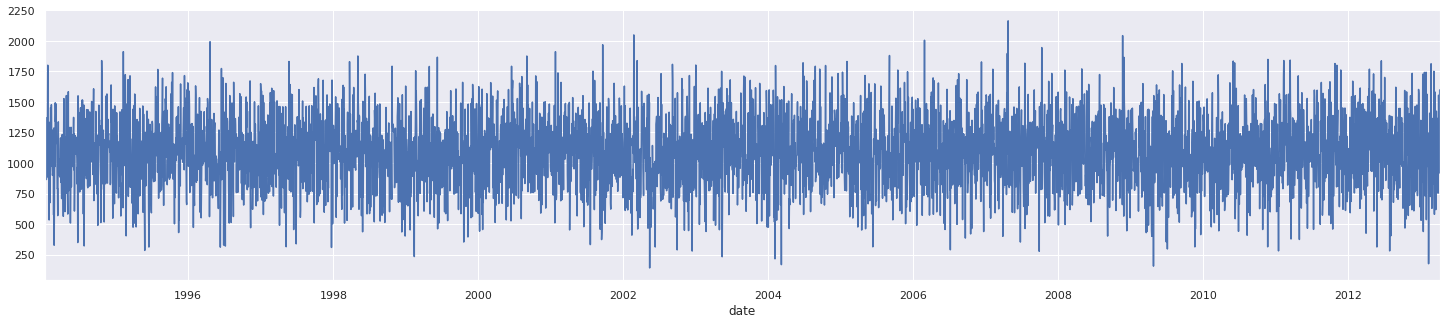

In [ ]:
df_train.un.plot(figsize=(25,5))
plt.show()

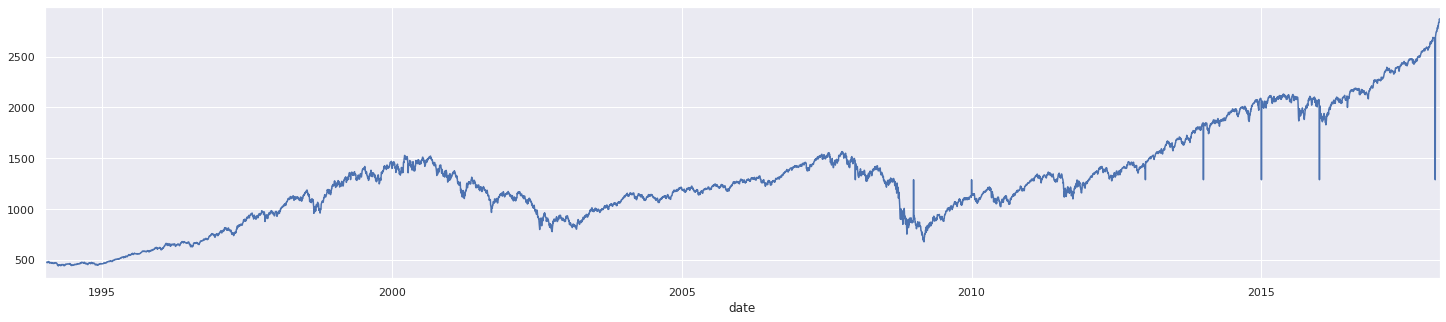

In [ ]:
df_copy.market_value.plot(figsize=(25,5))
plt.show()

In [ ]:
#stationary 
from statsmodels.tsa.stattools import adfuller 

adfuller_model=adfuller(df_train['market_value'])
adfuller_model

(-1.732534472275294,
 0.4144324691187694,
 12,
 5008,
 {'1%': -3.431656440695734,
  '10%': -2.5670773004997116,
  '5%': -2.862117305719603},
 41694.335822783585)